In [ ]:

# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#!ls /content/gdrive


Mounted at /content/drive


In [ ]:
# configuration

path = "/content/drive/MyDrive/Colab Notebooks/Project/"


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as Data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image

#if torch.cuda.is_available():
torch.set_default_tensor_type(torch.cuda.FloatTensor)


Check for completeness of data. May be missing some pt files; catch and proceed as needed.

In [ ]:
pd.set_option('display.max_columns', None)

t0 = pd.read_pickle(path + "vgg_train_dataframe0.plk")
print(len(t0))
t1 = pd.read_pickle(path + "vgg_train_dataframe1.plk")
print(len(t1))
t2 = pd.read_pickle(path + "vgg_train_dataframe2.plk")
print(len(t2))
t3 = pd.read_pickle(path + "vgg_train_dataframe3.plk")
print(len(t3))
t4 = pd.read_pickle(path + "vgg_train_dataframe_29100-30000.plk")
print(len(t4))
print(t4)

train_dataframe = pd.concat([t0,t1,t2,t3,t4], ignore_index=True)
train_dataframe = train_dataframe.drop(columns=['code'])
print(train_dataframe.shape)

print((train_dataframe.iloc[0][0]).shape)
print((train_dataframe.iloc[0][1]).shape)


50000
50000
49505
50000
4000
                                           vgg_features  \
0     [[0.0, 3.0081987, 1.0161858, 0.0, 0.0, 0.01396...   
1     [[0.0, 2.340932, 0.15303178, 0.0, 0.0, 0.0, 0....   
2     [[0.0, 2.976328, 1.4431802, 0.0, 0.0, 0.0, 0.0...   
3     [[0.0, 2.941891, 0.7900459, 0.0, 0.0, 0.0, 0.0...   
4     [[0.0, 3.41351, 1.5615478, 0.0, 0.0, 0.1688193...   
...                                                 ...   
3995  [[0.0, 0.0, 0.7894358, 0.0, 0.0, 1.6114902, 0....   
3996  [[0.0, 0.57877684, 1.1173061, 0.0, 0.0, 1.7183...   
3997  [[0.0, 0.45844308, 1.3342934, 0.0, 0.0, 0.9041...   
3998  [[0.0, 0.0, 1.4911028, 0.0, 0.0, 0.75950897, 0...   
3999  [[0.0, 0.30547443, 1.1901125, 0.0, 0.0, 0.7063...   

                                                  label    code  
0     [0.9999999999999996, 0.003322259136212624, 0.0...  236345  
1     [0.9999999999999996, 0.003322259136212624, 0.0...  236345  
2     [0.9999999999999996, 0.003322259136212624, 0.0...  236345 

In [ ]:

t0 = pd.read_pickle(path + "vgg_val_dataframe0.plk")
print(len(t0))
t1 = pd.read_pickle(path + "vgg_val_dataframe1.plk")
print(len(t1))
t2 = pd.read_pickle(path + "vgg_val_dataframe2.plk")
print(len(t2))
t3 = pd.read_pickle(path + "vgg_val_dataframe3.plk")
print(len(t3))
t4 = pd.read_pickle(path + "vgg_val_dataframe_29100-30000.plk")
print(len(t4))
print(t4)

valid_dataframe = pd.concat([t0,t1,t2,t3,t4], ignore_index=True)
valid_dataframe = valid_dataframe.drop(columns=['code'])
print(valid_dataframe.shape)

print((valid_dataframe.iloc[0][0]).shape)
print((valid_dataframe.iloc[0][1]).shape)


10000
10000
9901
10000
800
                                          vgg_features  \
0    [[0.0, 3.9689722, 1.0368829, 0.0, 0.0, 0.0, 0....   
1    [[0.0, 3.7131584, 0.3471653, 0.0, 0.0, 1.60644...   
2    [[0.13338347, 2.9063916, 0.93644464, 0.3611078...   
3    [[0.0, 0.37331316, 1.9078496, 0.0, 0.0, 1.2323...   
4    [[0.0, 0.42096403, 0.13496403, 0.0, 0.0, 0.0, ...   
..                                                 ...   
795  [[0.0, 0.0, 0.1191352, 0.0, 0.0, 2.5553823, 0....   
796  [[0.0, 0.1032901, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
797  [[0.028471306, 0.0, 0.0, 0.0, 0.0, 2.3150787, ...   
798  [[0.0, 0.23892754, 0.0, 0.0, 0.0, 0.0, 0.0, 0....   
799  [[0.0, 0.5421733, 1.394614, 0.0, 0.0, 1.071397...   

                                                 label    code  
0    [0.9999999999999996, 0.003322259136212624, 0.0...  236345  
1    [0.0033222591362126247, 0.0033222591362126247,...  236347  
2    [0.001993054024209403, 0.001993054024209403, 0...  236348  
3    [0.00332225

In [ ]:
t = pd.read_pickle(path + "vgg_test_dataframe.plk")
print(len(t))
print(t)

test_dataframe = pd.concat([t], ignore_index=True)
test_dataframe = test_dataframe.drop(columns=['code'])
print(test_dataframe.shape)

print((test_dataframe.iloc[0][0]).shape)
print((test_dataframe.iloc[0][1]).shape)

9090
                                           vgg_features  \
0     [[0.0, 2.609432, 0.31362665, 0.0, 0.0, 1.13993...   
1     [[0.0, 2.1560633, 1.599299, 0.0, 0.0, 0.448947...   
2     [[0.0, 2.5422206, 1.5606009, 0.0, 0.0, 0.85861...   
3     [[0.0, 2.1465702, 1.2806202, 0.0, 0.0, 0.96443...   
4     [[0.0, 2.5319064, 2.0605423, 0.0, 0.0, 0.94422...   
...                                                 ...   
9085  [[0.0, 0.0, 1.3145533, 0.0, 0.0, 1.6519538, 0....   
9086  [[0.24867792, 0.0, 1.0329994, 0.0, 0.0, 1.4303...   
9087  [[0.15975739, 0.0, 1.573962, 0.0, 0.0, 1.27631...   
9088  [[0.0, 0.0, 1.1476645, 0.0, 0.0, 1.6769286, 0....   
9089  [[0.0, 0.0, 2.056572, 0.0, 0.0, 2.0004914, 0.0...   

                                                  label    code  
0     [0.0016638935108153076, 0.0016638935108153076,...  266512  
1     [0.0016638935108153076, 0.0016638935108153076,...  266512  
2     [0.0016638935108153076, 0.0016638935108153076,...  266512  
3     [0.0016638935108

In [ ]:

class Dataset(torch.utils.data.Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        if torch.is_tensor(index):
          index = index.tolist()

        X = self.X[index]
        y = self.y[index]
        
        return X,y


How to test for accuracy when this is a regression problem?

In [ ]:
# some helper functions
# add more as needed

def plot_result(x=None, y=[], title=[], x_axis="", y_axis="", plot_title=""):
    # accuracy plot
    plt.figure()

    i = 0
    for accu in y:
      plt.plot(x, accu, label=title[i])
      i += 1
    
    # Texts
    plt.legend(loc='best')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(plot_title)

    plt.ylim(0)

    # show plot
    plt.show()

def evaluate(model, loss_fnc, val_iter):
  model.eval()

  running_loss = 0.0
  running_correct = 0.0
  count = 0.0

  for data in val_iter:
    X, y = data

    X = torch.squeeze(X,1)
    X = X.type(torch.cuda.FloatTensor)
    y = y.type(torch.cuda.FloatTensor)
    # """""""""""""""""CHANGE""""""""""""""""" IF CUDA
    output = model(X)
    loss = loss_fnc(output, y)

    running_loss += loss.item()*len(y)
    running_correct += accurate(output, y)
    count += len(y)
  return running_correct/count, running_loss/count

def accurate(pred, label):
  return 0.2
  #return the number of correct predictions
  #i.e. how many pred are matching label
  #"""""""""""""""""CHANGE"""""""""""""""""


In [16]:
# vgg model & train

# vgg model
# likely MLP
# match in/out-put size
class VGGMLP(nn.Module):
  def __init__(self):
    super(VGGMLP, self).__init__()

    # in-size 4096
    self.fc1 = nn.Linear(4096, 1024)
    self.rl1 = nn.LeakyReLU()

    # semantic output 1000
    self.fc2 = nn.Linear(1024, 1000)
    self.rl2 = nn.LeakyReLU()

    # output size 300
    self.fc3 = nn.Linear(1000, 300)
    self.rl3 = nn.LeakyReLU()

  def forward(self, features):
    x = self.fc1(features)
    x = self.rl1(x)
    x = self.fc2(x)
    x = self.rl2(x)

    x = self.fc3(x)
    x = self.rl3(x)

    return x


# Configure data

# hyperparameters
batch_size = 512
learning_rate = 0.001
E = 25

# model setup
#model = VGGMLP()
model = torch.load(path + 'vgg_model.pt')
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# data setup
train_set = Dataset(train_dataframe['vgg_features'].values, train_dataframe['label'].values)
valid_set = Dataset(valid_dataframe['vgg_features'].values, valid_dataframe['label'].values)
test_set = Dataset(test_dataframe['vgg_features'].values, test_dataframe['label'].values)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)


# use as applicable
#if torch.cuda.is_available():
model.cuda()
#"""""""""""""""""CHANGE"""""""""""""""""
# change in the training loop if need to convert to cuda



VGGMLP(
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (rl1): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=1024, out_features=1000, bias=True)
  (rl2): LeakyReLU(negative_slope=0.01)
  (fc3): Linear(in_features=1000, out_features=300, bias=True)
  (rl3): LeakyReLU(negative_slope=0.01)
)

[  1] train loss: 0.00430 train accu: 0.000391 valid loss: 0.004919 valid accu: 0.000393
[  2] train loss: 0.00417 train accu: 0.000391 valid loss: 0.004833 valid accu: 0.000393
[  3] train loss: 0.00405 train accu: 0.000391 valid loss: 0.004771 valid accu: 0.000393
[  4] train loss: 0.00395 train accu: 0.000391 valid loss: 0.004696 valid accu: 0.000393
[  5] train loss: 0.00386 train accu: 0.000391 valid loss: 0.004604 valid accu: 0.000393
[  6] train loss: 0.00378 train accu: 0.000391 valid loss: 0.004549 valid accu: 0.000393
[  7] train loss: 0.00371 train accu: 0.000391 valid loss: 0.004474 valid accu: 0.000393
[  8] train loss: 0.00364 train accu: 0.000391 valid loss: 0.004420 valid accu: 0.000393
[  9] train loss: 0.00357 train accu: 0.000391 valid loss: 0.004383 valid accu: 0.000393
[ 10] train loss: 0.00352 train accu: 0.000391 valid loss: 0.004360 valid accu: 0.000393
[ 11] train loss: 0.00345 train accu: 0.000391 valid loss: 0.004287 valid accu: 0.000393
[ 12] train loss: 0.0

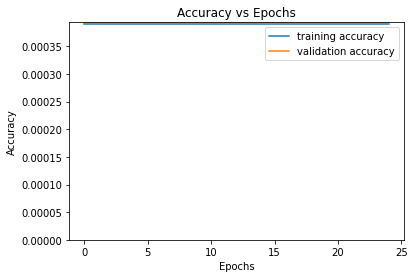

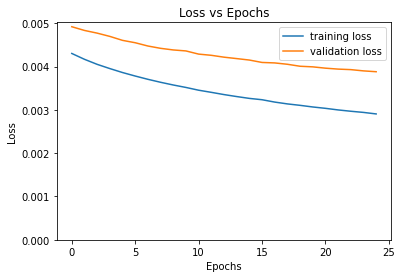

Test accuracy and loss:  (0.0003960396039603961, 0.009385436309380631)


In [17]:

# training loop
epochs = []
trainAccu = []
trainLoss = []
validAccu = []
validLoss = []

for epoch in range(E):
  running_loss = 0.0
  running_correct = 0.0
  count = 0.0

  model.train()

  for i, data in enumerate(train_loader):
    # organize data
    X, y = data
    
    X = torch.squeeze(X,1)
    X = X.type(torch.cuda.FloatTensor)
    y = y.type(torch.cuda.FloatTensor)
    # """""""""""""""""CHANGE""""""""""""""""" IF CUDA
    
    # train
    optimizer.zero_grad()

    output = model(X)

    loss = loss_fnc(output, y)
    loss.backward()

    optimizer.step()

    # test
    running_loss += loss.item()*len(y)
    running_correct += accurate(output, y)
    count += len(y)
  
  # evaluate at every epoch
  trainAccu.append(running_correct/count)
  trainLoss.append(running_loss/count)
  epochs.append(epoch)

  # evaluate validation accuracy
  correct, loss = evaluate(model, loss_fnc, valid_loader)

  validAccu.append(correct)
  validLoss.append(loss)

  print("[%3d] train loss: %.5f train accu: %f valid loss: %f valid accu: %f" % (epoch+1, trainLoss[-1], trainAccu[-1], validLoss[-1], validAccu[-1]))

  # save at every epoch if needed
  torch.save(model, path + 'vgg_model.pt')

# visualize result
plot_result(x=epochs, y=[trainAccu, validAccu], title=["training accuracy", "validation accuracy"], x_axis="Epochs", y_axis="Accuracy", plot_title="Accuracy vs Epochs")
plot_result(x=epochs, y=[trainLoss, validLoss], title=["training loss", "validation loss"], x_axis="Epochs", y_axis="Loss", plot_title="Loss vs Epochs")
print("Test accuracy and loss: ", evaluate(model, loss_fnc, test_loader))

torch.save(model, path + 'vgg_model.pt')


In [ ]:
# resnet model & train

# ============================================= ENDLINE =============================================
# ============================================= ENDLINE =============================================
# ============================================= ENDLINE =============================================

# ======================================= NOT UPDATED YET =======================================
# ===================================== NEED UPDATE LIKE VGG ====================================

# resnet model
# likely MLP
# match in/out-put size
class RESNetMLP(nn.Module):
  def __init__(self):
    super(RESNetMLP, self).__init__()

    # in-size 2048
    self.fc1 = nn.Linear(2048, 1024)
    self.rl1 = nn.LeakyReLU()

    # semantic output 1000
    self.fc2 = nn.Linear(1024, 1000)
    self.rl2 = nn.LeakyReLU()

    # output size 300
    self.fc3 = nn.Linear(1000, 300)
    self.rl3 = nn.LeakyReLU()

  def forward(self, features):
    x = self.fc1(features)
    x = self.rl1(x)
    x = self.fc2(x)
    x = self.rl2(x)

    x = self.fc3(x)
    x = self.rl3(x)

    return x


# Configure data

# hyperparameters
batch_size = 
learning_rate = 
E = 
etc. """""""""""""""""CHANGE"""""""""""""""""


# model setup
model = RESNetMLP()
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# data setup
train_set = read from file - RESNet """""""""""""""""CHANGE"""""""""""""""""
valid_set = read from file
test_set = read from file

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)


# use as applicable
if torch.cuda.is_available(): 
  model.cuda()
"""""""""""""""""CHANGE"""""""""""""""""
# change in the training loop if need to convert to cuda


# training loop
epochs = []
trainAccu = []
trainLoss = []
validAccu = []
validLoss = []

for epoch in range(E):
  running_loss = 0.0
  running_correct = 0.0
  count = 0.0

  model.train()

  for i, data in enumerate(train_loader):
    # organize data
    X, y = data
    # """""""""""""""""CHANGE""""""""""""""""" IF CUDA
    
    # train
    optimizer.zero_grad()

    output = model(X)

    loss = loss_fnc(output, y)
    loss.backward()

    optimizer.step()

    # test
    running_loss += loss.item()*len(y)
    running_correct += accurate(output, y)
    count += len(y)
  
  # evaluate at every epoch
  trainAccu.append(running_correct/count)
  trainLoss.append(running_loss/count)
  epochs.append(epoch)

  # evaluate validation accuracy
  correct, loss = evaluate(model, loss_fnc, valid_loader)

  validAccu.append(correct)
  validLoss.append(loss)

  print("[%3d] train loss: %.5f train accu: %f valid loss: %f valid accu: %f" % (epoch+1, trainLoss[-1], trainAccu[-1], validLoss[-1], validAccu[-1]))

  # save at every epoch if needed
  torch.save(model, path + 'resnet_model.pt')

# visualize result
plot_result(x=epochs, y=[trainAccu, validAccu], title=["training accuracy", "validation accuracy"], x_axis="Epochs", y_axis="Accuracy", plot_title="Accuracy vs Epochs")
plot_result(x=epochs, y=[trainLoss, validLoss], title=["training loss", "validation loss"], x_axis="Epochs", y_axis="Loss", plot_title="Loss vs Epochs")
print("Test accuracy and loss: ", evaluate(model, loss_fnc, test_loader))

torch.save(model, path + 'resnet_model.pt')
